In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [3]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
# 1) Determine all the variable types
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [5]:
# 1 cont.) Find the fraction of the missing values for each variable
useducation_df.isnull().sum()/len(useducation_df)

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

2) Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [6]:
no_nulls_df = useducation_df.copy()
for col in no_nulls_df.columns:
    if no_nulls_df[col].isnull().sum() > 0:
        no_nulls_df.loc[:, col] = no_nulls_df.loc[:, col].fillna(no_nulls_df.loc[:, col].mean())
no_nulls_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

3) Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [7]:
no_nulls_df2 = useducation_df.copy()

years = no_nulls_df2["YEAR"].unique()

for col in no_nulls_df2.columns:
    if no_nulls_df2[col].isnull().sum() > 0:
        for year in years:
            no_nulls_df2.loc[no_nulls_df2["YEAR"] == year, col] = no_nulls_df2.loc[no_nulls_df2["YEAR"] == year, col].fillna(
                no_nulls_df2[no_nulls_df2["YEAR"] == year][col].mean())
no_nulls_df2.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          107
TOTAL_REVENUE                    51
FEDERAL_REVENUE                  51
STATE_REVENUE                    51
LOCAL_REVENUE                    51
TOTAL_EXPENDITURE                51
INSTRUCTION_EXPENDITURE          51
SUPPORT_SERVICES_EXPENDITURE     51
OTHER_EXPENDITURE               107
CAPITAL_OUTLAY_EXPENDITURE       51
GRADES_PK_G                     102
GRADES_KG_G                     102
GRADES_4_G                      102
GRADES_8_G                      102
GRADES_12_G                     102
GRADES_1_8_G                    102
GRADES_9_12_G                   102
GRADES_ALL_G                    102
AVG_MATH_4_SCORE                860
AVG_MATH_8_SCORE                860
AVG_READING_4_SCORE             860
AVG_READING_8_SCORE             860
dtype: int64

4) This time, fill in the missing values using interpolation (extrapolation).

In [8]:
no_nulls_df3 = useducation_df.copy()

for col in no_nulls_df3.columns:
    no_nulls_df3.loc[:, col] = no_nulls_df3.loc[:, col].interpolate(limit_direction='both')
no_nulls_df3.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

5) Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [9]:
for col in useducation_df.columns:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([useducation_df[col], no_nulls_df[col],
                     no_nulls_df2[col], no_nulls_df3[col]], axis=1).describe())

Statistics for columns: PRIMARY_KEY
          PRIMARY_KEY    PRIMARY_KEY    PRIMARY_KEY    PRIMARY_KEY
count            1492           1492           1492           1492
unique           1487           1487           1487           1487
top     2008_VIRGINIA  2008_VIRGINIA  2008_VIRGINIA  2008_VIRGINIA
freq                3              3              3              3
Statistics for columns: STATE
                       STATE                 STATE                 STATE  \
count                   1492                  1492                  1492   
unique                    80                    80                    80   
top     DISTRICT_OF_COLUMBIA  DISTRICT_OF_COLUMBIA  DISTRICT_OF_COLUMBIA   
freq                      29                    29                    29   

                       STATE  
count                   1492  
unique                    80  
top     DISTRICT_OF_COLUMBIA  
freq                      29  
Statistics for columns: YEAR
              YEAR         YEAR   

          GRADES_8_G     GRADES_8_G     GRADES_8_G     GRADES_8_G
count    1361.000000    1492.000000    1390.000000    1492.000000
mean    64271.057311   64271.057311   64331.744106   59511.380027
std     78910.545776   75364.301721   78083.976028   77123.573668
min       437.000000     437.000000     437.000000     437.000000
25%     13342.000000   15682.750000   13698.250000   10252.000000
50%     43339.000000   49571.000000   44756.500000   38114.500000
75%     76566.000000   72131.000000   75016.250000   72598.250000
max    500143.000000  500143.000000  500143.000000  500143.000000
Statistics for columns: GRADES_12_G
        GRADES_12_G    GRADES_12_G    GRADES_12_G    GRADES_12_G
count    1361.00000    1492.000000    1390.000000    1492.000000
mean    54268.92432   54268.924320   54418.075582   50207.239276
std     67889.27623   64838.328605   67187.337112   66309.867155
min       311.00000     311.000000     311.000000     311.000000
25%     10919.00000   13437.000000   11161.75

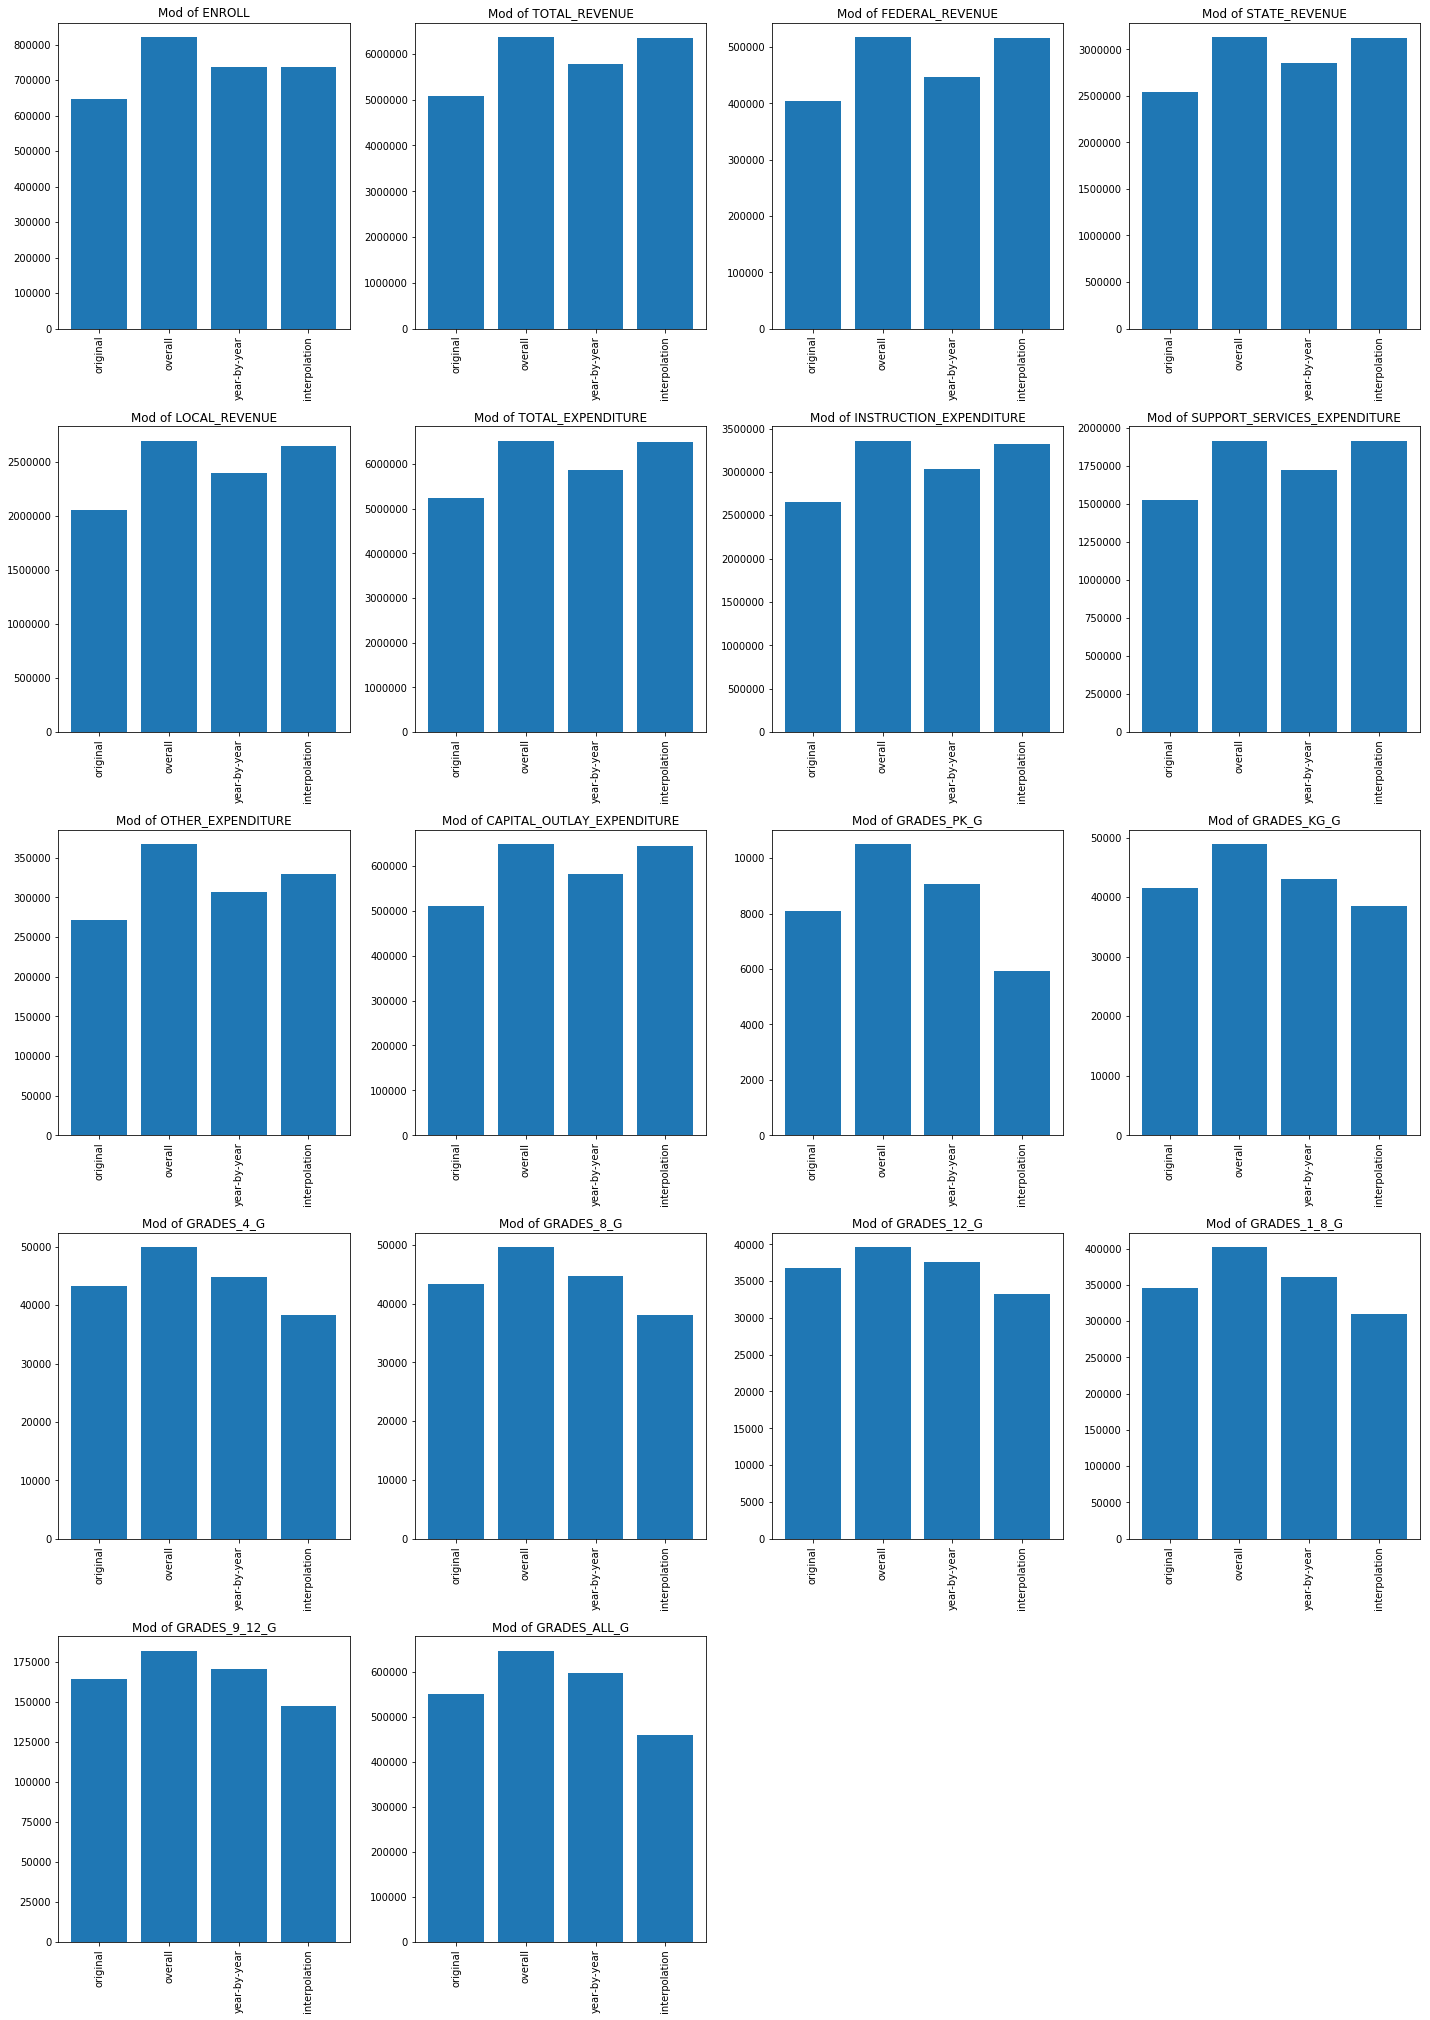

In [10]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]


fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([useducation_df[col], no_nulls_df[col],
                     no_nulls_df2[col], no_nulls_df3[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()